# Exploratory Data Analysis - read dataframes
*by Alyssia Oh (data cleaning by Rahul Parab)*

In [1]:
# imports

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates

%matplotlib inline

In [ ]:
# read the CSV files

df = pd.read_csv('/Users/alyssiaoh/dsi/project/project_5/COVID-19-vaccinations/rahul/hospitals_by_county.csv')

In [25]:
df_mask = pd.read_csv('/Users/alyssiaoh/dsi/project/project_5/COVID-19-vaccinations/alyssia/Cases_Normalized_per_100k.csv')

## mask.csv basic inspection

In [6]:
# check the size of dataframes  
df.shape

(16293, 9)

In [7]:
# check how many null values are in each

df.isnull().sum()


county                                   0
todays_date                              0
hospitalized_covid_confirmed_patients    0
hospitalized_suspected_covid_patients    0
hospitalized_covid_patients              0
all_hospital_beds                        0
icu_covid_confirmed_patients             0
icu_suspected_covid_patients             0
icu_available_beds                       0
dtype: int64

In [28]:
# check how many counties we have

df_mask.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17486 entries, 0 to 17485
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   county                                   17486 non-null  object 
 1   totalcountconfirmed                      17486 non-null  float64
 2   totalcountdeaths                         17486 non-null  float64
 3   newcountconfirmed                        17486 non-null  int64  
 4   newcountdeaths                           17486 non-null  int64  
 5   date                                     17486 non-null  object 
 6   NEVER                                    17486 non-null  float64
 7   RARELY                                   17486 non-null  float64
 8   SOMETIMES                                17486 non-null  float64
 9   FREQUENTLY                               17486 non-null  float64
 10  ALWAYS                                   17486

In [14]:
df.head()

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Kings,2020-03-29,2.0,5.0,7.0,292.0,1.0,0.0,2.0
1,Yolo,2020-03-29,2.0,3.0,5.0,251.0,1.0,1.0,0.0
2,San Diego,2020-03-29,121.0,211.0,332.0,4459.0,77.0,39.0,205.0
3,Modoc,2020-03-29,0.0,0.0,0.0,11.0,0.0,0.0,0.0
4,Mono,2020-03-29,0.0,1.0,1.0,292.0,0.0,0.0,2.0


In [29]:
df['date'] = pd.to_datetime(df['todays_date'])
df_mask['date'] = pd.to_datetime(df_mask['date'])

In [24]:
df = df.sort_values(['county', 'todays_date'])
df.set_index(['county', 'date'])

todays_date  hospitalized_covid_confirmed_patients  \
county  date                                                            
Alameda 2020-03-29  2020-03-29                                   36.0   
        2020-03-30  2020-03-30                                   59.0   
        2020-03-31  2020-03-31                                   56.0   
        2020-04-01  2020-04-01                                   52.0   
        2020-04-02  2020-04-02                                   57.0   
...                        ...                                    ...   
Yuba    2021-01-09  2021-01-09                                   56.0   
        2021-01-10  2021-01-10                                   56.0   
        2021-01-11  2021-01-11                                   54.0   
        2021-01-12  2021-01-12                                   55.0   
        2021-01-13  2021-01-13                                   53.0   

                    hospitalized_suspected_covid_patients  \
county  date                                                
Alameda 2020-03-29                                   91.0   
        2020-03-30                                   89.0   
        2020-03-31                                   94.0   
        2020-04-01                                   76.0   
        2020-04-02                                   76.0   
...                                                   ...   
Yuba    2021-01-09                                    0.0   
        2021-01-10                                    0.0   
        2021-01-11                                    0.0   
        2021-01-12                                    0.0   
        2021-01-13                                    0.0   

                    hospitalized_covid_patients  all_hospital_beds  \
county  date                                                         
Alameda 2020-03-29                        127.0             2694.0   
        2020-03-30                        148.0             3248.0   
        2020-03-31                        150.0             1832.0   
        2020-04-01                        128.0             2427.0   
        2020-04-02                        133.0             2550.0   
...                                         ...                ...   
Yuba    2021-01-09                         56.0              261.0   
        2021-01-10                         56.0              261.0   
        2021-01-11                         54.0              261.0   
        2021-01-12                         55.0              261.0   
        2021-01-13                         53.0              261.0   

                    icu_covid_confirmed_patients  \
county  date                                       
Alameda 2020-03-29                          20.0   
        2020-03-30                          27.0   
        2020-03-31                          27.0   
        2020-04-01                          27.0   
        2020-04-02                          29.0   
...                                          ...   
Yuba    2021-01-09                          12.0   
        2021-01-10                          14.0   
        2021-01-11                          14.0   
        2021-01-12                          15.0   
        2021-01-13                          15.0   

                    icu_suspected_covid_patients  icu_available_beds  
county  date                                                          
Alameda 2020-03-29                          16.0               119.0  
        2020-03-30                          18.0               146.0  
        2020-03-31                          17.0                77.0  
        2020-04-01                          15.0               106.0  
        2020-04-02                          17.0               112.0  
...                                          ...                 ...  
Yuba    2021-01-09                           0.0                 5.0  
        2021-01-10                           0.0

In [30]:
merged = pd.merge(df, df_mask[['county', 'date', 'population']], on=['county', 'date'])

In [32]:
merged.drop(columns=['todays_date'])

,county,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,date,population
0,Alameda,36.0,91.0,127.0,2694.0,20.0,16.0,119.0,2020-03-29,1671329
1,Alameda,59.0,89.0,148.0,3248.0,27.0,18.0,146.0,2020-03-30,1671329
2,Alameda,56.0,94.0,150.0,1832.0,27.0,17.0,77.0,2020-03-31,1671329
3,Alameda,52.0,76.0,128.0,2427.0,27.0,15.0,106.0,2020-04-01,1671329
4,Alameda,57.0,76.0,133.0,2550.0,29.0,17.0,112.0,2020-04-02,1671329
...,...,...,...,...,...,...,...,...,...,...
16282,Yuba,56.0,0.0,56.0,261.0,12.0,0.0,5.0,2021-01-09,78668
16283,Yuba,56.0,0.0,56.0,261.0,14.0,0.0,2.0,2021-01-10,78668
16284,Yuba,54.0,0.0,54.0,261.0,14.0,0.0,2.0,2021-01-11,78668
16285,Yuba,55.0,0.0,55.0,261.0,15.0,0.0,1.0,2021-01-12,78668


In [33]:
df = merged.copy()

In [34]:
df['icu_covid_patients'] = df['icu_covid_confirmed_patients'] + df['icu_suspected_covid_patients']

In [35]:

# make new columns normalized to population
# popular metrics used lists numbers per 100K population, so follow the same method

df['hospitalizedper100k'] = df['hospitalized_covid_patients']/df['population']*100000
df['ICUpatientsper100k'] = df['icu_covid_patients']/df['population']*100000
df['hospitalbedavailable100k'] = df['all_hospital_beds']/df['population']*100000
df['icubedavailableper100k'] = df['icu_available_beds']/df['population']*100000


In [36]:
# daily cases fluctuate a lot
# added 7-day rolling average columns to smooth out the variations 

df_bycounty = pd.DataFrame(df.groupby('county', sort=False)['hospitalizedper100k'].rolling(7).mean())
df_bycounty.set_index(keys=df.index, inplace=True)
df_bycounty.tail(30)
df_bycounty.columns = ['7dayrollingavg_hospitalizedper100k']

merged = pd.merge(df, df_bycounty, left_index=True, right_index=True)



In [38]:
# repeat for daily deaths count
# pd. merge used to avoid conflict with groupby().rolling function 


df_bycounty2 = pd.DataFrame(df.groupby('county', sort=False)['ICUpatientsper100k'].rolling(7).mean())
df_bycounty2.set_index(keys=df.index, inplace=True)

df_bycounty2.columns = ['7dayrollingavg_ICUpatientsper100k']

merged2 = pd.merge(merged, df_bycounty2, left_index=True, right_index=True)


df = merged2.copy()
df.tail(30)

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,date,population,icu_covid_patients,hospitalizedper100k,ICUpatientsper100k,hospitalbedavailable100k,icubedavailableper100k,7dayrollingavg_hospitalizedper100k,7dayrollingavg_ICUpatientsper100k
16257,Yuba,2020-12-15,59.0,0.0,59.0,261.0,14.0,0.0,2.0,2020-12-15,78668,14.0,74.998729,17.796309,331.774038,2.542330,71.911614,17.069929
16258,Yuba,2020-12-16,53.0,1.0,54.0,261.0,13.0,0.0,2.0,2020-12-16,78668,13.0,68.642904,16.525144,331.774038,2.542330,72.819589,17.433119
16259,Yuba,2020-12-17,54.0,0.0,54.0,261.0,12.0,0.0,2.0,2020-12-17,78668,12.0,68.642904,15.253979,331.774038,2.542330,73.727564,17.614714
16260,Yuba,2020-12-18,54.0,0.0,54.0,261.0,12.0,0.0,2.0,2020-12-18,78668,12.0,68.642904,15.253979,331.774038,2.542330,74.453944,17.069929
16261,Yuba,2020-12-19,57.0,0.0,57.0,261.0,12.0,0.0,5.0,2020-12-19,78668,12.0,72.456399,15.253979,331.774038,6.355824,73.364374,16.525144
16262,Yuba,2020-12-20,58.0,0.0,58.0,261.0,10.0,0.0,0.0,2020-12-20,78668,10.0,73.727564,12.711649,331.774038,0.000000,72.274804,15.617169
16263,Yuba,2020-12-21,62.0,0.0,62.0,261.0,9.0,0.0,6.0,2020-12-21,78668,9.0,78.812224,11.440484,331.774038,7.626989,72.274804,14.890789
16264,Yuba,2020-12-22,63.0,0.0,63.0,261.0,9.0,0.0,4.0,2020-12-22,78668,9.0,80.083388,11.440484,331.774038,5.084660,73.001184,13.982814
16265,Yuba,2020-12-23,58.0,0.0,58.0,261.0,7.0,0.0,4.0,2020-12-23,78668,7.0,73.727564,8.898154,331.774038,5.084660,73.727564,12.893244
16266,Yuba,2020-12-24,57.0,0.0,57.0,261.0,9.0,0.0,3.0,2020-12-24,78668,9.0,72.456399,11.440484,331.774038,3.813495,74.272349,12.348459


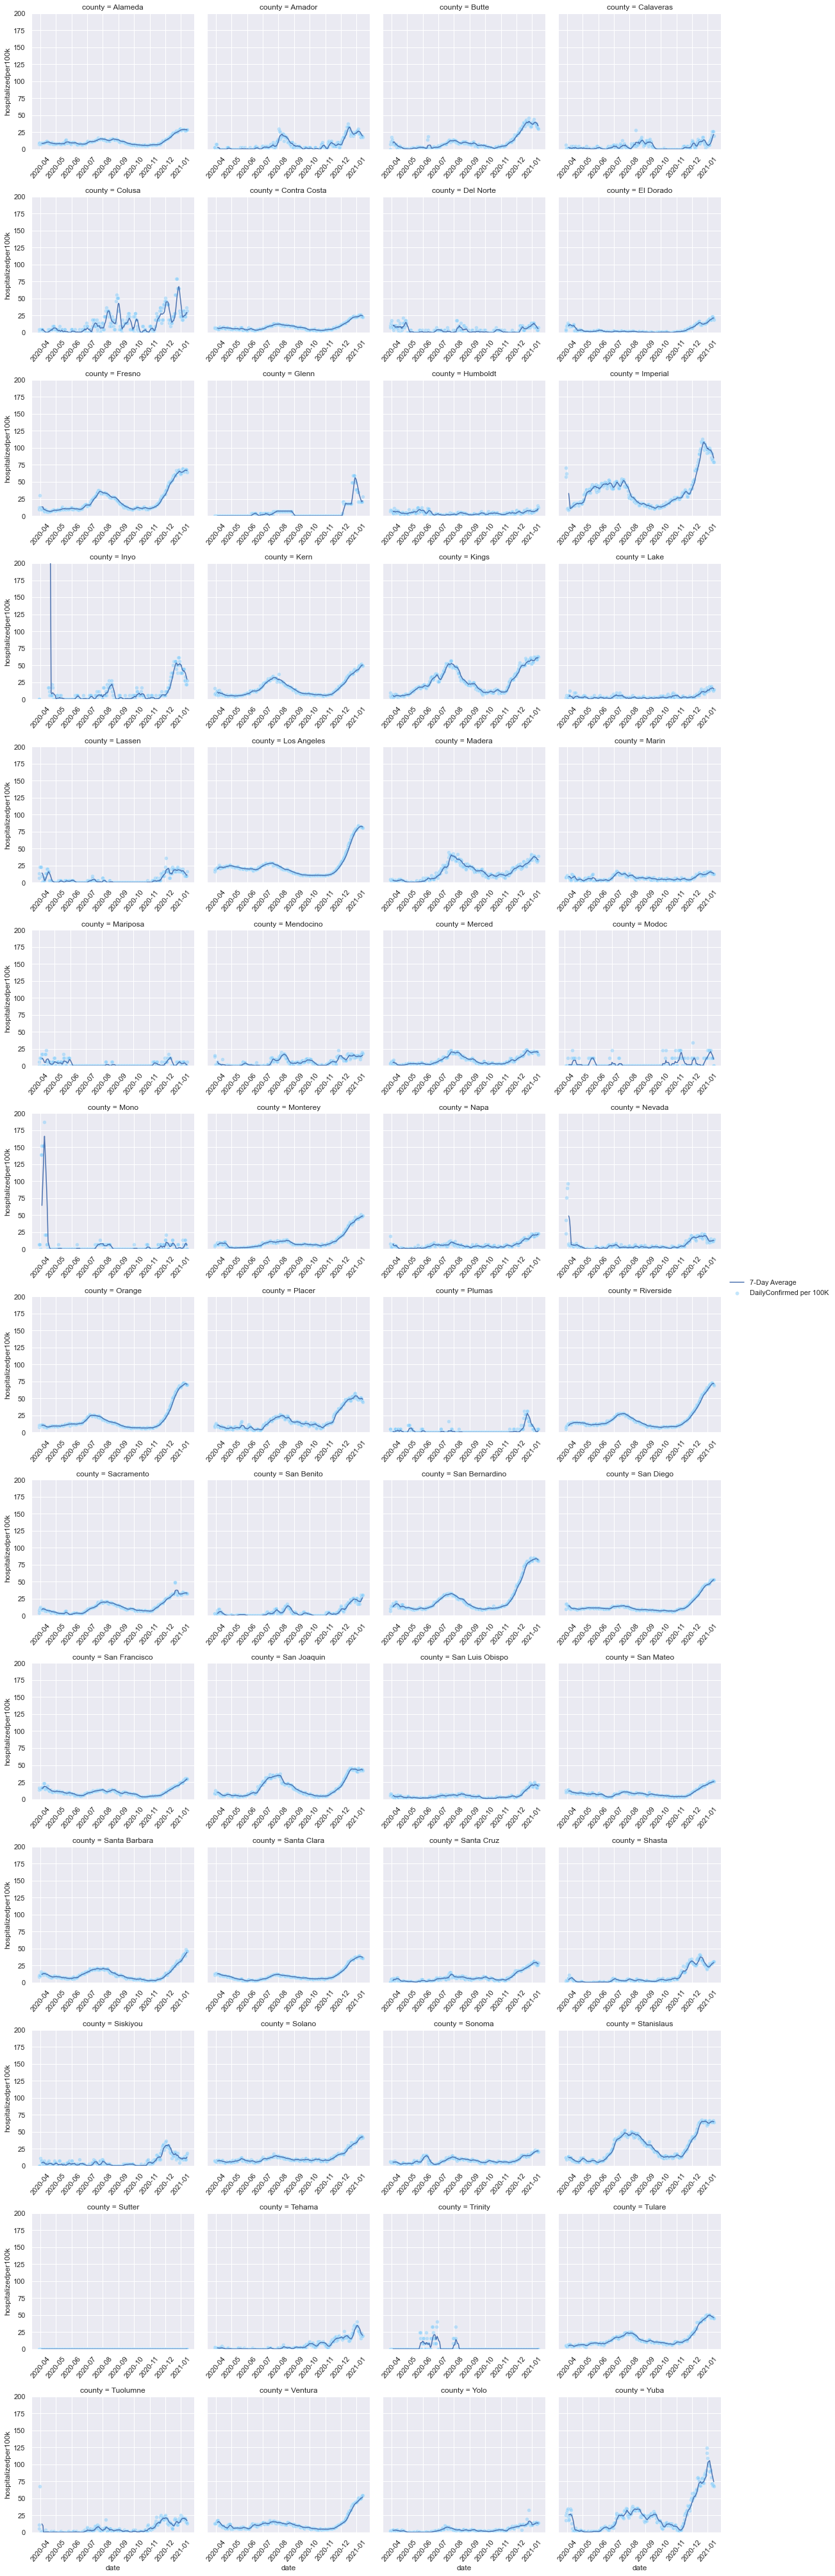

In [40]:
# graph the daily hospitalized (total of confirmed & suspected) normalized by 100k population 
# light blue dots = normalized daily count
# dark blue line = 7-day rolling average


sns.set_theme(style="darkgrid")

g = sns.FacetGrid(df, col="county", col_wrap=4, height=4, aspect=1, sharex=False, margin_titles=True, ylim=(0,200))
g.map(sns.lineplot, "date", '7dayrollingavg_hospitalizedper100k', label='7-Day Average')
g.map(sns.scatterplot, "date", 'hospitalizedper100k', alpha=.5, color='lightskyblue', label='DailyConfirmed per 100K')

xformatter = mdates.DateFormatter("%y/%m")

g.axes[0].xaxis.set_major_formatter(xformatter)

g.set_xticklabels(rotation=50)
g.fig.tight_layout()
g.add_legend()

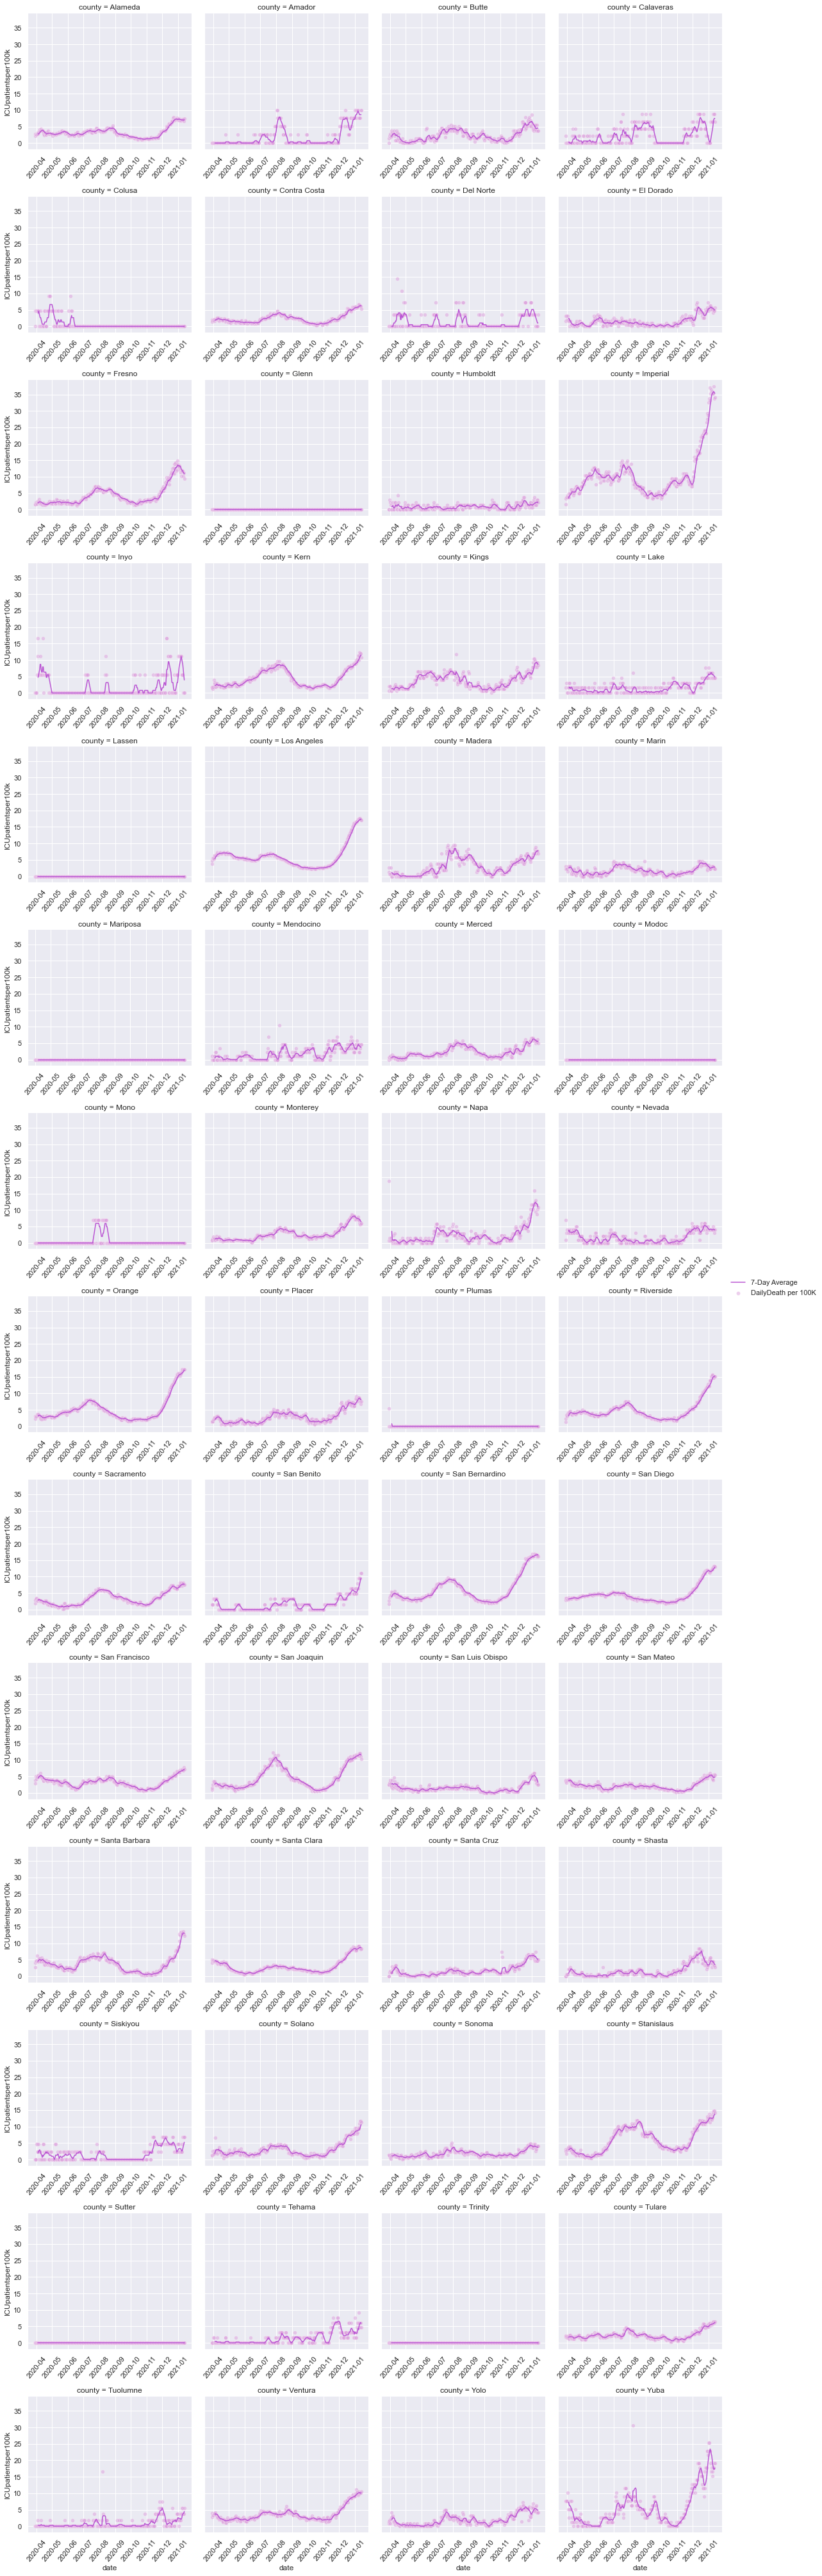

In [44]:
# graph the daily ICU patients normalized by 100k population 
# light pink dots = normalized 
# dark purple line = 7-day rolling average

g = sns.FacetGrid(df, col="county", col_wrap=4, height=4, aspect=1, sharex=False, margin_titles=True)
g.map(sns.lineplot, "date", '7dayrollingavg_ICUpatientsper100k', color='mediumorchid', label='7-Day Average')
g.map(sns.scatterplot, "date", 'ICUpatientsper100k', alpha=.5, color='plum', label='DailyDeath per 100K')

xformatter = mdates.DateFormatter("%y/%m")

g.axes[0].xaxis.set_major_formatter(xformatter)

g.set_xticklabels(rotation=50)
g.fig.tight_layout()

g.add_legend()